In [1]:
"""Project 1, Questions 1-5"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.options.mode.chained_assignment = None # default = 'warn'

__author__ = "Kyle Riggs"
__version__ = "Fall 2022"

### 1. Problem Statements
#### Load the data (It should have at least 100 rows) and get familiar with it. Describe the data source and include its link.  

Link: https://www.kaggle.com/datasets/gregorut/videogamesales  
The data source is a collection of more than 16,500 games that sold more than 100,000 copies. Aside from the name of each game, it also includes information about which platform the game was sold on, which company published the game, the year it released, the genre,and sales figures both for the global market as well as individual markets (for North America, Europe, Japan, and other).  

#### List out three questions you want to investigate from this dataset. These questions could be a trend, a comparison between different groups of a categorical feature, a relationship between two variables, or a distribution of a numerical value.
1. Which platform has the most global sales of all time?  
2. For the platform with the most global sales, which genre of game had the most global sales?  
3. For the genre with the most global sales on the platform with the most global sales, which year had the most global sales?

In [21]:
df = pd.read_csv("vgsales.csv")
print("Shape:", df.shape)
df.head(10)

Shape: (16598, 11)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### 2. Data Cleaning
#### Follow the data cleaning steps to clean the data.
##### a. Drop any unwanted features if necessary.

In [22]:
remove = ['Rank', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
df.drop(remove, axis = 1, inplace = True)
print("Shape:", df.shape)

Shape: (16598, 5)


##### b. Address any missing values.

In [23]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Global_Sales      0
dtype: int64

In [24]:
df.dropna(subset = ['Year'], inplace = True)
print("Shape:", df.shape)

Shape: (16327, 5)


##### c. Remove duplicates if necessary.

In [25]:
df.drop_duplicates(subset = ['Name', 'Platform', 'Year'], keep = 'first', inplace = True)
print("Shape:", df.shape)

Shape: (16326, 5)


##### d. Check the data type of each column.

In [26]:
print(df.dtypes)

Name             object
Platform         object
Year            float64
Genre            object
Global_Sales    float64
dtype: object


In [27]:
df['Year'] = df['Year'].astype('Int64')
print(df.dtypes)

Name             object
Platform         object
Year              Int64
Genre            object
Global_Sales    float64
dtype: object


##### e. For categorical variables, check if there are any inconsistent inputs.
There are no input inconsistencies for categorical variables in the dataset.

In [28]:
df['Platform'].value_counts()

DS      2133
PS2     2127
PS3     1303
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [29]:
df['Genre'].value_counts()

Action          3253
Sports          2303
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

##### f. For numeric variables, check for outliers.
As this dataset was last updated 6 years ago, any game with a release date after 2016 are mislabeled, and thus will be removed to prevent inaccurate results.

In [30]:
df['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     656
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: Int64

In [32]:
df = df[df['Year'] < 2017]
df['Year'].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     656
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       9
Name: Year, dtype: Int64

### 3. Exploratory Data Analysis and Interpretation of the Results
#### Question 1: Which platform has the most global sales of all time?
##### 1a. Process the data. Generate the results you want.

In [37]:
df_q1 = df.groupby('Platform')['Global_Sales'].sum().reset_index()
df_q1.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_q1.head(10)

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.34
26,Wii,909.81
4,DS,818.67
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
18,PS4,278.07
13,PC,255.05


##### 1b. Create a graph to visualize the result.

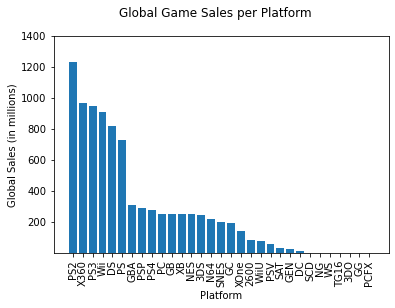

In [45]:
plt.bar(df_q1.iloc[:,0], df_q1.iloc[:,1])
plt.suptitle('Global Game Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=90)
plt.yticks([200, 400, 600, 800, 1000, 1200, 1400])
plt.show()

##### 1c. Interpret the result. Explain your findings.
The graph shows that the PS2 is the platform with the most global game sales, with just over 1.2 billion global sales. Overall, beyond the PS2, there is a sharp decrease in global sales before the next five platforms, which themselves have a gradual decrease in global sales, starting with the X360 at just under 1.0 billion global sales. Beyond those five, there is another sharp decrease in sales, followed by another gradual decrease, starting with the GBA at just over 300 million global sales.

#### Question 2: For the platform with the most global sales, which genre of game had the most global sales?
##### 2a. Process the data. Generate the results you want.

In [50]:
df_q2 = df[df['Platform'] == 'PS2'].groupby('Genre')['Global_Sales'].sum().reset_index()
df_q2.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_q2.head(10)

,Genre,Global_Sales
0,Action,272.43
10,Sports,262.64
6,Racing,154.21
8,Shooter,108.28
3,Misc,98.69
7,Role-Playing,91.55
2,Fighting,89.19
4,Platform,72.11
9,Simulation,42.26
1,Adventure,21.16


##### 2b. Create a graph to visualize the result.

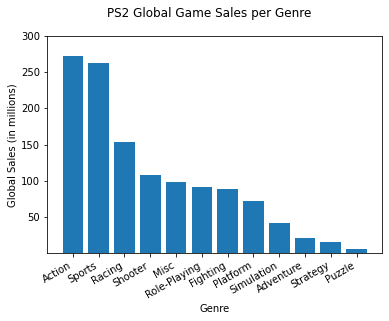

In [53]:
plt.bar(df_q2.iloc[:,0], df_q2.iloc[:,1])
plt.suptitle('PS2 Global Game Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=30, ha='right')
plt.yticks([50, 100, 150, 200, 250, 300])
plt.show()

##### 2c. Interpret the result. Explain your findings.
The graph shows that Action is the genre with the most global game sales on the PS2, with roughly 270 million global sales.
Overall, besides Sports, the genre with the second most global sales at roughly 260 million global sales, starting at Racing with roughly 150 million sales the rest of the genres see a gradual decrease in global sales.

#### Question 3: For the genre with the most global sales on the platform with the most global sales, which year had the most global sales?
##### 3a. Process the data. Generate the result you want.

In [65]:
df_q3 = df[(df['Platform'] == 'PS2') & (df['Genre'] == 'Action')].groupby('Year')['Global_Sales'].sum().reset_index()
df_q3.sort_values(by='Global_Sales', ascending=False, inplace=True)
df_q3.head(10)

,Year,Global_Sales
4,2004,49.40
2,2002,46.66
5,2005,42.74
3,2003,40.32
1,2001,35.06
6,2006,20.27
7,2007,17.01
8,2008,11.51
9,2009,4.66
0,2000,3.39


##### 3b. Create a graph to visualize the result.

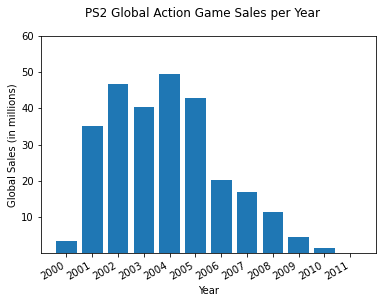

In [66]:
plt.bar(df_q3.iloc[:,0], df_q3.iloc[:,1])
plt.suptitle('PS2 Global Action Game Sales per Year')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.xticks([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011], rotation=30, ha='right')
plt.yticks([10, 20, 30, 40, 50, 60])
plt.show()

##### 3c. Interpret the results. Explain your findings.
The graph shows that 2004 is the year that had the most global action game sales on the PS2, with roughly 50 million global sales. Overall, it can be inferred that the launch of the PS2 was around the end of the year 2000, and the launch of its successor, the PS3, was likely in 2006, the first year the PS2's global action game sales saw a significant drop followed by a gradual decrease, instead of staying relatively stable as it did between the years of 2001 to 2005.

### 4. Summary
#### Summarize the main findings from this project as well as what you failed to find from the results. Describe what you want to further explore about this topic.
As all 3 questions were answered sufficiently, there was nothing I set out to find that I did not find from my results.  

I found that the PS2 is the platform with the most global sales across all platforms. Additionally, the genre with the most global sales on the PS2 is the Action genre. Of all years the PS2 sold action games, 2004 was the year with the most action games sold globally.

In conclusion, my findings are that the "most typical" game, or the type of game that is most likely to have been played by anyone who plays video games, would be an Action game on the PS2 that released in 2004.

Something I could further expore about this topic is whether or not platform had a significant effect on how many sales a particular genre had.

### 5. Upload it to your Github Repository. Then include a link to your Github Repository and upload the entire Jupyter-notebook file to Moodle.
Github Repo: https://github.com/KyleRiggs/DataAnalyticsP1